<a href="https://colab.research.google.com/github/NazHub1993/Data_Analysis_Projects/blob/main/ML_Algorithms(K_fold_Cross_Validation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


In [248]:
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

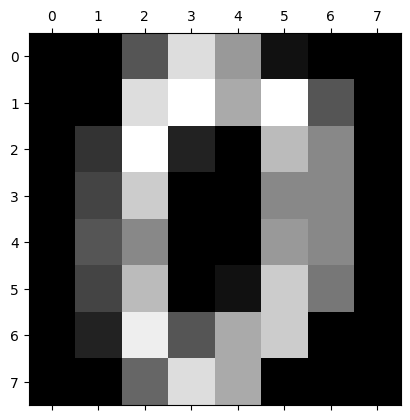

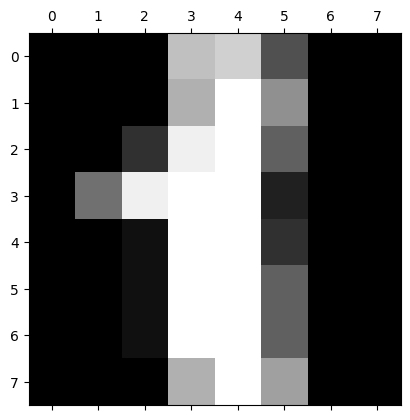

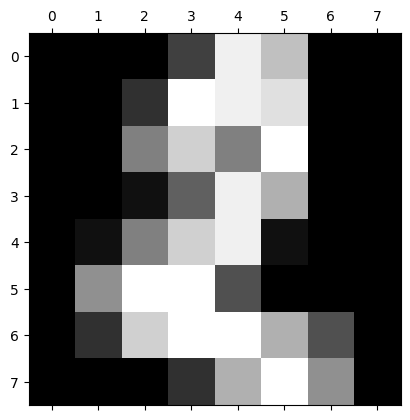

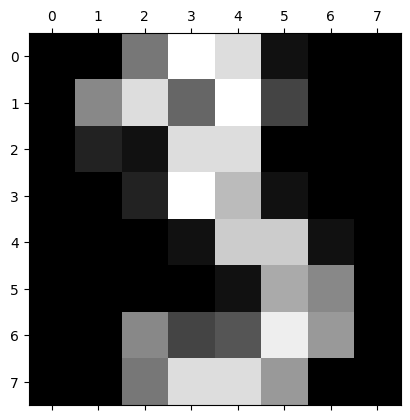

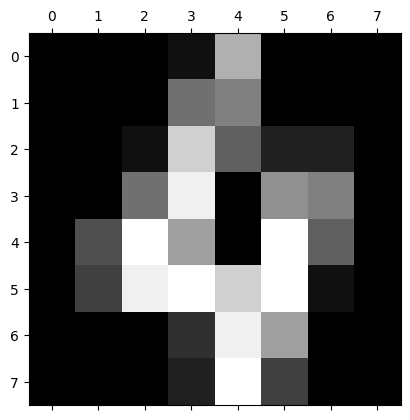

In [249]:
for i in range(5):
  plt.matshow(digits.images[i])

In [250]:
from sklearn.datasets import load_digits
digits=load_digits(as_frame=True)

df=digits.frame
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [251]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('target',axis='columns'),df.target,test_size=0.2)

In [252]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [253]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


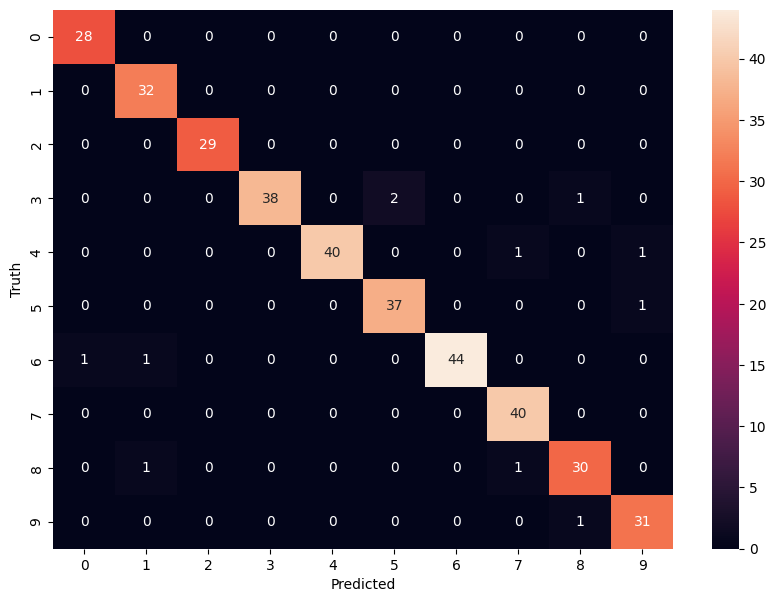

In [254]:
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [255]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9694444444444444


#But suppose you want to know that whether my choice for model should be SVC,RandomForest or DecisionTreeClassifier ??

In [256]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Accuracy for SVC: ",accuracy_score(y_test,y_pred))

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print("Accuracy for DecisionTree: ",accuracy_score(y_test,y_pred))

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy for RandomForest: ",accuracy_score(y_test,y_pred))




Accuracy for SVC:  0.9861111111111112
Accuracy for DecisionTree:  0.8555555555555555
Accuracy for RandomForest:  0.9722222222222222


#Suppose you declare a function for it instead of witing these 4 lines again and again

In [257]:
def get_score(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print("Accuracy for the above model:",accuracy_score(y_test,y_pred))

In [258]:
get_score(SVC(),x_train,x_test,y_train,y_test)

Accuracy for the above model: 0.9861111111111112


In [259]:
get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

Accuracy for the above model: 0.8638888888888889


In [260]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

Accuracy for the above model: 0.9694444444444444


In [261]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


#Now Time for the k-folds

In [262]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=3)


In [263]:
X=df.drop('target',axis='columns')
Y=df.target


In [264]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [276]:
for train_index,test_index in folds.split(X,Y):
  x_train,x_test,y_train,y_test=X.iloc[train_index],X.iloc[test_index],Y.iloc[train_index],Y.iloc[test_index]
  get_score(SVC(),x_train,x_test,y_train,y_test)
  get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)
  get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)




Accuracy for the above model: 0.9649415692821369
Accuracy for the above model: 0.7262103505843072
Accuracy for the above model: 0.9365609348914858
Accuracy for the above model: 0.9799666110183639
Accuracy for the above model: 0.8247078464106845
Accuracy for the above model: 0.9499165275459098
Accuracy for the above model: 0.9649415692821369
Accuracy for the above model: 0.7529215358931552
Accuracy for the above model: 0.9265442404006677


In [271]:
get_score(SVC(),x_train,x_test,y_train,y_test)

Accuracy for the above model: 0.9649415692821369


In [272]:
get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

Accuracy for the above model: 0.7696160267111853


In [273]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

Accuracy for the above model: 0.9232053422370617


In [280]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(SVC(),X,Y,cv=3))
print(cross_val_score(DecisionTreeClassifier(),X,Y,cv=3))
print(cross_val_score(RandomForestClassifier(n_estimators=50),X,Y,cv=3))

[0.96494157 0.97996661 0.96494157]
[0.75626043 0.82470785 0.76293823]
[0.93155259 0.95993322 0.92988314]


#So here SVC will be a great approach!!!